# 📊 Satellite Data Exploration & Analysis

**Objective:** Explore real satellite data from Google Earth Engine, understand data quality, distributions, and patterns.

**Data Sources:**
- `data/raw/satellite_data.csv` - Raw satellite metrics (NDVI, LST, precipitation)
- `data/processed/training_data_real.csv` - Processed training data with crop features

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add project paths
sys.path.append(str(Path.cwd().parent / "src"))
sys.path.append(str(Path.cwd().parent / "data" / "raw"))

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Satellite Data

In [6]:
# Load raw satellite data
satellite_df = pd.read_csv("../data/raw/satellite_data.csv")
print(f"Raw Satellite Data Shape: {satellite_df.shape}")
print(f"Columns: {list(satellite_df.columns)}\n")

# Load processed training data
training_df = pd.read_csv("../data/processed/training_data_real.csv")
print(f"Training Data Shape: {training_df.shape}")
print(f"Columns: {list(training_df.columns)}\n")

# Display first few rows
print("="*80)
print("SATELLITE DATA SAMPLE:")
print("="*80)
satellite_df.head()

Raw Satellite Data Shape: (180, 14)
Columns: ['region', 'district', 'latitude', 'longitude', 'fetch_date', 'period', 'ndvi_mean', 'ndvi_max', 'ndvi_min', 'ndvi_std', 'lst_mean_c', 'lst_max_c', 'lst_min_c', 'precipitation_annual_mm']

Training Data Shape: (2700, 26)
Columns: ['region', 'district', 'latitude', 'longitude', 'ndvi_mean', 'ndvi_max', 'ndvi_min', 'ndvi_std', 'lst_mean_c', 'lst_max_c', 'lst_min_c', 'precipitation_annual_mm', 'crop', 'crop_category', 'crop_temp_min', 'crop_temp_max', 'crop_water_need', 'crop_ndvi_min', 'crop_drought_sens', 'crop_frost_sens', 'region_suitable', 'temp_match', 'water_match', 'ndvi_score', 'risk_score', 'risk_category']

SATELLITE DATA SAMPLE:


,region,district,latitude,longitude,fetch_date,period,ndvi_mean,ndvi_max,ndvi_min,ndvi_std,lst_mean_c,lst_max_c,lst_min_c,precipitation_annual_mm
0,Tashkent City,Almazar,41.3167,69.2167,2025-12-05T00:15:20.087191,1_year,0.2140,0.3311,0.0707,0.0698,24.7,43.6,-2.5,253.6
1,Tashkent City,Bektemir,41.2167,69.3333,2025-12-05T00:15:25.602357,1_year,0.2676,0.4670,0.0420,0.1040,24.1,41.7,-2.7,233.4
2,Tashkent City,Chilanzar,41.2833,69.1833,2025-12-05T00:15:31.916436,1_year,0.2034,0.3272,0.0407,0.0741,24.8,43.4,-2.7,253.6
3,Tashkent City,Yakkasaray,41.2833,69.2667,2025-12-05T00:15:36.668350,1_year,0.2232,0.3607,0.0797,0.0737,24.8,43.6,-2.1,241.7
4,Tashkent City,Mirzo Ulugbek,41.3500,69.2833,2025-12-05T00:15:41.420809,1_year,0.2307,0.3465,0.1018,0.0662,24.7,43.4,-2.6,240.3


In [3]:
# Training data sample
print("="*80)
print("TRAINING DATA SAMPLE:")
print("="*80)
training_df.head()

TRAINING DATA SAMPLE:


,region,district,latitude,longitude,ndvi_mean,ndvi_max,ndvi_min,ndvi_std,lst_mean_c,lst_max_c,...,crop_water_need,crop_ndvi_min,crop_drought_sens,crop_frost_sens,region_suitable,temp_match,water_match,ndvi_score,risk_score,risk_category
0,Tashkent City,Almazar,41.3167,69.2167,0.214,0.3311,0.0707,0.0698,24.7,43.6,...,700,0.40,0.5,0.8,0,0.728,0.521714,0.6,50.6,yellow
1,Tashkent City,Almazar,41.3167,69.2167,0.214,0.3311,0.0707,0.0698,24.7,43.6,...,450,0.35,0.3,0.2,1,0.828,0.716311,0.6,75.0,green
2,Tashkent City,Almazar,41.3167,69.2167,0.214,0.3311,0.0707,0.0698,24.7,43.6,...,1200,0.45,0.9,0.8,0,0.688,0.250767,0.6,38.6,red
3,Tashkent City,Almazar,41.3167,69.2167,0.214,0.3311,0.0707,0.0698,24.7,43.6,...,500,0.40,0.5,0.8,1,0.688,0.630400,0.6,70.6,green
4,Tashkent City,Almazar,41.3167,69.2167,0.214,0.3311,0.0707,0.0698,24.7,43.6,...,600,0.35,0.7,0.8,0,0.628,0.509267,0.6,46.5,yellow


## 2. Data Quality Assessment

In [4]:
# Check for missing values
print("="*80)
print("MISSING VALUES - SATELLITE DATA:")
print("="*80)
missing_sat = satellite_df.isnull().sum()
print(missing_sat[missing_sat > 0] if missing_sat.sum() > 0 else "No missing values ✓")

print("\n" + "="*80)
print("MISSING VALUES - TRAINING DATA:")
print("="*80)
missing_train = training_df.isnull().sum()
print(missing_train[missing_train > 0] if missing_train.sum() > 0 else "No missing values ✓")

# Data types
print("\n" + "="*80)
print("DATA TYPES:")
print("="*80)
print(satellite_df.dtypes)

MISSING VALUES - SATELLITE DATA:
No missing values ✓

MISSING VALUES - TRAINING DATA:
No missing values ✓

DATA TYPES:
region                      object
district                    object
latitude                   float64
longitude                  float64
fetch_date                  object
period                      object
ndvi_mean                  float64
ndvi_max                   float64
ndvi_min                   float64
ndvi_std                   float64
lst_mean_c                 float64
lst_max_c                  float64
lst_min_c                  float64
precipitation_annual_mm    float64
dtype: object


In [7]:
# Statistical summary
print("="*80)
print("SATELLITE METRICS - STATISTICAL SUMMARY:")
print("="*80)
satellite_df[['ndvi_mean', 'ndvi_std', 'lst_mean_c', 'lst_max_c', 'lst_min_c', 'precipitation_annual_mm']].describe()

SATELLITE METRICS - STATISTICAL SUMMARY:


,ndvi_mean,ndvi_std,lst_mean_c,lst_max_c,lst_min_c,precipitation_annual_mm
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.287721,0.111643,23.543889,40.538889,-1.920556,151.910556
std,0.074949,0.041161,2.391212,3.613080,2.711278,55.822348
min,0.086400,0.010600,12.600000,34.000000,-13.500000,59.000000
25%,0.230025,0.081675,22.000000,38.050000,-3.400000,111.625000
50%,0.293150,0.107300,23.150000,39.650000,-1.750000,145.000000
75%,0.361125,0.137175,24.700000,42.625000,-0.700000,192.050000
max,0.398700,0.225500,30.300000,51.000000,6.000000,277.400000


## 3. Distribution Analysis

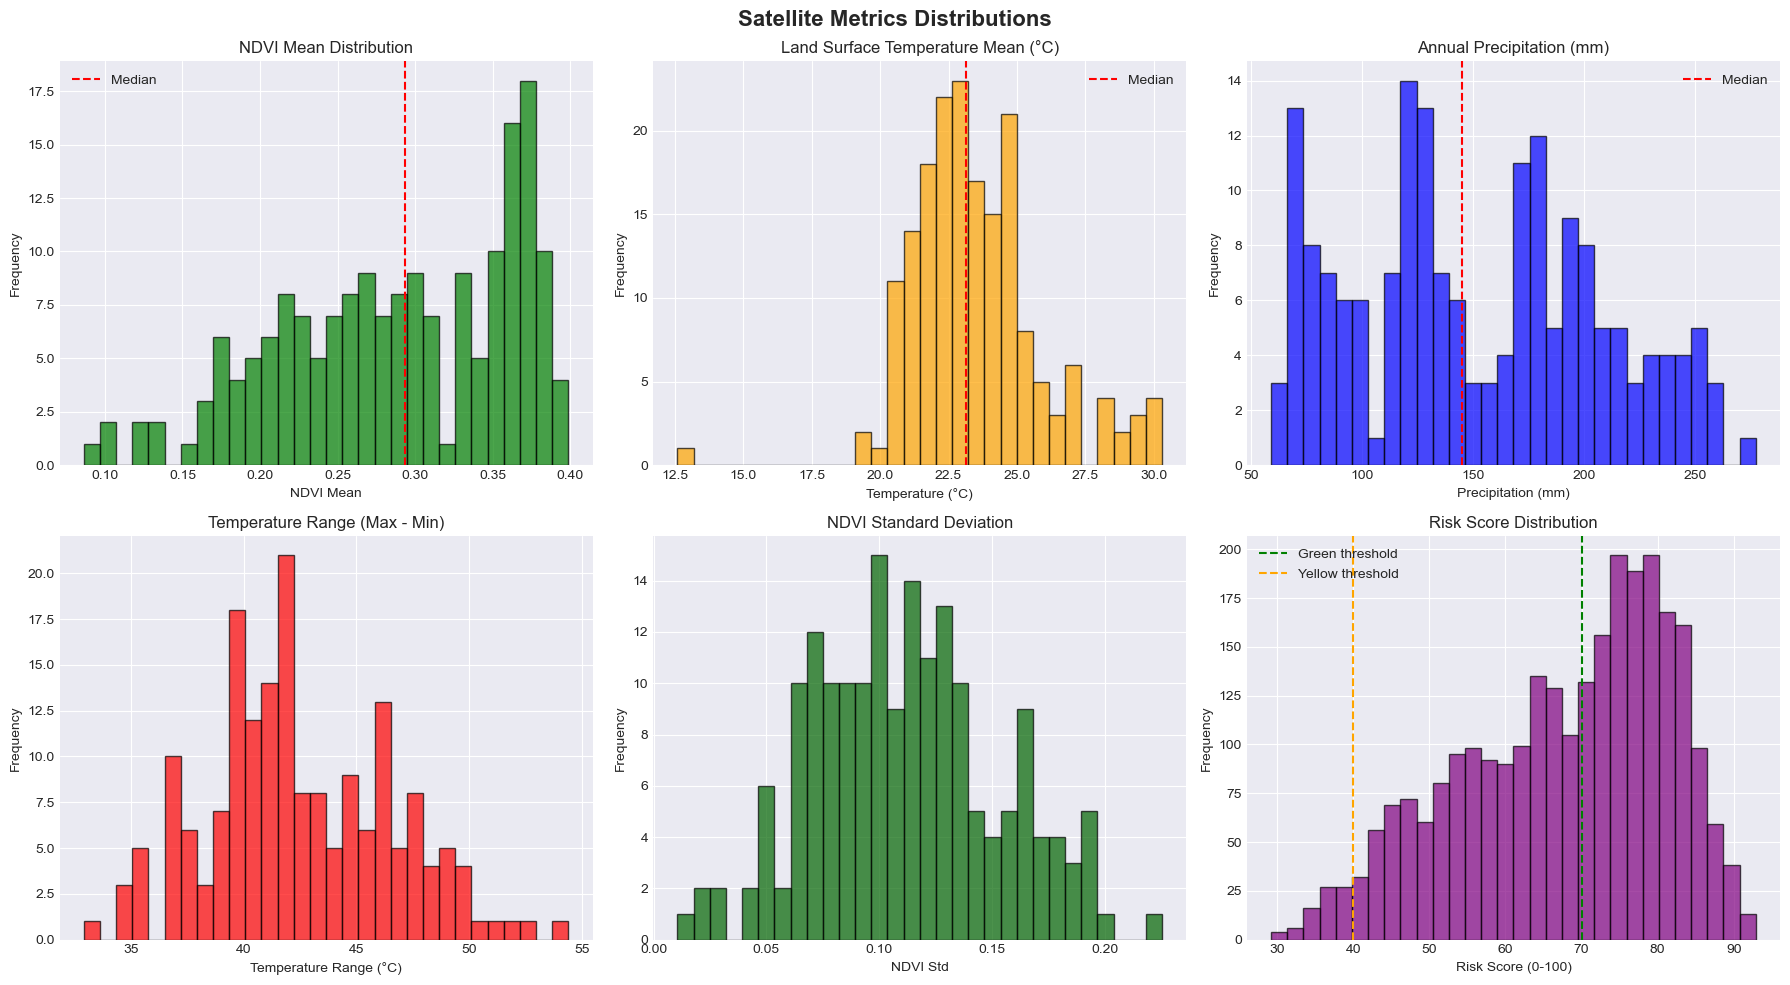


✓ NDVI Range: 0.086 - 0.399
✓ LST Range: 12.6°C - 30.3°C
✓ Precipitation Range: 59 - 277 mm


In [8]:
# Distribution plots for key satellite metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Satellite Metrics Distributions', fontsize=16, fontweight='bold')

# NDVI Mean
axes[0, 0].hist(satellite_df['ndvi_mean'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('NDVI Mean Distribution')
axes[0, 0].set_xlabel('NDVI Mean')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(satellite_df['ndvi_mean'].median(), color='red', linestyle='--', label='Median')
axes[0, 0].legend()

# LST Mean
axes[0, 1].hist(satellite_df['lst_mean_c'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Land Surface Temperature Mean (°C)')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(satellite_df['lst_mean_c'].median(), color='red', linestyle='--', label='Median')
axes[0, 1].legend()

# Precipitation
axes[0, 2].hist(satellite_df['precipitation_annual_mm'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Annual Precipitation (mm)')
axes[0, 2].set_xlabel('Precipitation (mm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(satellite_df['precipitation_annual_mm'].median(), color='red', linestyle='--', label='Median')
axes[0, 2].legend()

# LST Max/Min Range
axes[1, 0].hist(satellite_df['lst_max_c'] - satellite_df['lst_min_c'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Temperature Range (Max - Min)')
axes[1, 0].set_xlabel('Temperature Range (°C)')
axes[1, 0].set_ylabel('Frequency')

# NDVI Std
axes[1, 1].hist(satellite_df['ndvi_std'], bins=30, color='darkgreen', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('NDVI Standard Deviation')
axes[1, 1].set_xlabel('NDVI Std')
axes[1, 1].set_ylabel('Frequency')

# Risk Score Distribution (from training data)
axes[1, 2].hist(training_df['risk_score'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Risk Score Distribution')
axes[1, 2].set_xlabel('Risk Score (0-100)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].axvline(70, color='green', linestyle='--', label='Green threshold')
axes[1, 2].axvline(40, color='orange', linestyle='--', label='Yellow threshold')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print(f"\n✓ NDVI Range: {satellite_df['ndvi_mean'].min():.3f} - {satellite_df['ndvi_mean'].max():.3f}")
print(f"✓ LST Range: {satellite_df['lst_mean_c'].min():.1f}°C - {satellite_df['lst_mean_c'].max():.1f}°C")
print(f"✓ Precipitation Range: {satellite_df['precipitation_annual_mm'].min():.0f} - {satellite_df['precipitation_annual_mm'].max():.0f} mm")